Installing the necessary libraries

In [1]:
!pip install -U nilearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 34.2 MB/s eta 0:00:00


In [2]:
! pip install torchio einops surfa


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.7/487.7 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121

In [3]:
!pip install lightning
#pytorch lightning module to access and analyze skull stripping images

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 51.1 MB/s eta 0:00:00


In [4]:
!pip install opendatasets


In [5]:
!git clone https://github.com/drsehid/skull_stripping.git
#using the NPP open source library for preprocessing. Skull stripping images for better visualization and analysis.

Cloning into 'skull_stripping'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 85 (delta 22), reused 18 (delta 18), pack-reused 54
Receiving objects: 100% (85/85), 2.59 MiB | 6.96 MiB/s, done.
Resolving deltas: 100% (36/36), done.


# Importing libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from nilearn.image import math_img, load_img
import nilearn as nl
from nilearn import plotting as nplot
import os
import shutil
from glob import glob
import cv2
import nibabel as nib
from tqdm.notebook import tqdm
import torch


In [7]:
import sys
import torch.nn as nn
import argparse
import surfa as sf
import scipy.ndimage
from skull_stripping.models.model import UNet

In [8]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [9]:
import cv2
from tqdm import tqdm_notebook, tnrange
from glob import glob
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
#from skimage.morphology import label
from sklearn.model_selection import train_test_split

In [10]:
import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [11]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
import glob
import opendatasets as od
import keras
from keras.utils import plot_model
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.metrics import MeanIoU

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Exploratory Data Analysis

In [14]:
od.download(
    "https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: parthiba0810
Your Kaggle Key: ··········


100%|██████████| 714M/714M [00:06<00:00, 118MB/s]


In [15]:
class CFG:

    class path:
        to_root =  '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m'


In [16]:
mask_files = glob.glob(f"{CFG.path.to_root}/*/*_mask*")
diagnosis = [np.any(cv2.imread(file)) if cv2.imread(file) is not None else False for file in tqdm(mask_files)]
image_files = [file.replace('_mask', '') for file in tqdm(mask_files)]

  0%|          | 0/3929 [00:00<?, ?it/s]

  0%|          | 0/3929 [00:00<?, ?it/s]

In [17]:
df = pd.DataFrame({
    "image_path": image_files,
    "mask_path": mask_files,
    "diagnosis": diagnosis
})

print(f"df.shape={df.shape}")
df.sample(3).T

df.shape=(3929, 3)


,1561,1194,3031
image_path,/content/lgg-mri-segmentation/lgg-mri-segmenta...,/content/lgg-mri-segmentation/lgg-mri-segmenta...,/content/lgg-mri-segmentation/lgg-mri-segmenta...
mask_path,/content/lgg-mri-segmentation/lgg-mri-segmenta...,/content/lgg-mri-segmentation/lgg-mri-segmenta...,/content/lgg-mri-segmentation/lgg-mri-segmenta...
diagnosis,True,True,False


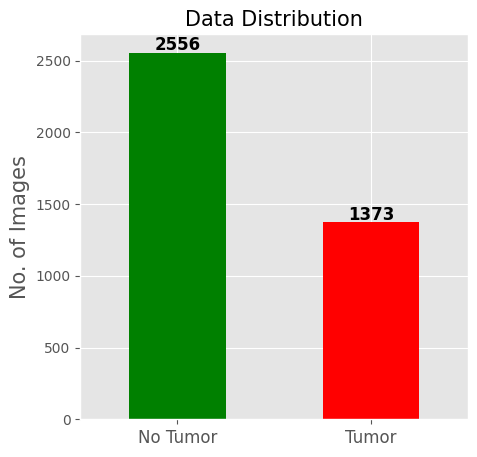

In [18]:
ax = df['diagnosis'].value_counts().plot(kind='bar', stacked=True, figsize=(5, 5), color=['green', 'red'])
ax.set_ylabel('No. of Images', fontsize=15)
ax.set_title('Data Distribution', fontsize=15)
ax.set_xticklabels(['No Tumor', 'Tumor'], fontsize=12, rotation=0)

for i, rows in enumerate(df['diagnosis'].value_counts().values):
    ax.annotate(int(rows), xy=(i, rows + 20), ha='center', fontweight='bold', fontsize=12)

# Building the Model

In [19]:
DataPath = "/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m"

In [20]:
dirs = []
images = []
masks = []
for dirname, _, filenames in os.walk(DataPath):
    for filename in filenames:
        if 'mask'in filename:
            dirs.append(dirname.replace(DataPath, ''))
            masks.append(filename)
            images.append(filename.replace('_mask', ''))

#here, the dirs list will contain the directory names for each file in datapath and store value with 'datapath' removed,
#masks will append the mask files and images will append the mask files removing the '_mask" extension
#i am essentially identifying image and mask files within the specified directory structure and organizing their names into separate lists

In [21]:
with torch.no_grad():
    model = UNet()
    model.to(device)
    model.eval()
#designing the evaluation criteria of no gradient model and model.eval to ensure
#that the model is in the correct mode for evaluation and to optimize memory usage

# Load and visualize data

In [22]:
print(masks[:10], images[:10])


['TCGA_FG_6691_20020405_10_mask.tif', 'TCGA_FG_6691_20020405_13_mask.tif', 'TCGA_FG_6691_20020405_21_mask.tif', 'TCGA_FG_6691_20020405_16_mask.tif', 'TCGA_FG_6691_20020405_40_mask.tif', 'TCGA_FG_6691_20020405_2_mask.tif', 'TCGA_FG_6691_20020405_3_mask.tif', 'TCGA_FG_6691_20020405_42_mask.tif', 'TCGA_FG_6691_20020405_1_mask.tif', 'TCGA_FG_6691_20020405_34_mask.tif'] ['TCGA_FG_6691_20020405_10.tif', 'TCGA_FG_6691_20020405_13.tif', 'TCGA_FG_6691_20020405_21.tif', 'TCGA_FG_6691_20020405_16.tif', 'TCGA_FG_6691_20020405_40.tif', 'TCGA_FG_6691_20020405_2.tif', 'TCGA_FG_6691_20020405_3.tif', 'TCGA_FG_6691_20020405_42.tif', 'TCGA_FG_6691_20020405_1.tif', 'TCGA_FG_6691_20020405_34.tif']


In [23]:
print(len(dirs), len(images), len(masks))


3929 3929 3929


In [24]:
imagePath_df = pd.DataFrame({'directory':dirs, 'images': images, 'masks': masks})
#mapping the corresponding file structure

In [25]:
imagePath_df.head(10)


,directory,images,masks
0,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_10.tif,TCGA_FG_6691_20020405_10_mask.tif
1,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_13.tif,TCGA_FG_6691_20020405_13_mask.tif
2,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_21.tif,TCGA_FG_6691_20020405_21_mask.tif
3,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_16.tif,TCGA_FG_6691_20020405_16_mask.tif
4,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_40.tif,TCGA_FG_6691_20020405_40_mask.tif
5,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_2.tif,TCGA_FG_6691_20020405_2_mask.tif
6,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_3.tif,TCGA_FG_6691_20020405_3_mask.tif
7,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_42.tif,TCGA_FG_6691_20020405_42_mask.tif
8,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_1.tif,TCGA_FG_6691_20020405_1_mask.tif
9,/TCGA_FG_6691_20020405,TCGA_FG_6691_20020405_34.tif,TCGA_FG_6691_20020405_34_mask.tif


In [26]:
#Randomly select files from datapath for both images and masks and print their shape
def print_imShape():
    idx = np.random.randint(0, len(imagePath_df))

    imagePath = DataPath+os.path.join(imagePath_df['directory'].iloc[idx], imagePath_df['images'].iloc[idx])
    maskPath = DataPath+os.path.join(DataPath, imagePath_df['directory'].iloc[idx], imagePath_df['masks'].iloc[idx])
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)

    if image is None:
        print("Failed to read image:", imagePath)
    if mask is None:
        print("Failed to read mask:", maskPath)

    if image is not None and mask is not None:
        print("Image Shape:", image.shape, "Mask Shape:", mask.shape )

In [27]:
for i in range(10):
    print_imShape()

Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)
Image Shape: (256, 256, 3) Mask Shape: (256, 256, 3)


### Visualizing the images, masks and the overall figure

In [28]:
def plot_images():
    idx = np.random.randint(0, len(imagePath_df))
    imagePath = DataPath+os.path.join(imagePath_df['directory'].iloc[idx], imagePath_df['images'].iloc[idx])
    maskPath = DataPath+os.path.join(DataPath, imagePath_df['directory'].iloc[idx], imagePath_df['masks'].iloc[idx])
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)


    fig, axs = plt.subplots(1,3, figsize=[10,11])

    axs[0].imshow(image)
    axs[0].set_title('Brain MRI')

    axs[1].imshow(mask)
    axs[1].set_title('Mask')

    axs[2].imshow(image)
    axs[2].imshow(mask, alpha=0.3)
    axs[2].set_title('MRI with mask')

    plt.grid(False)
    plt.show()

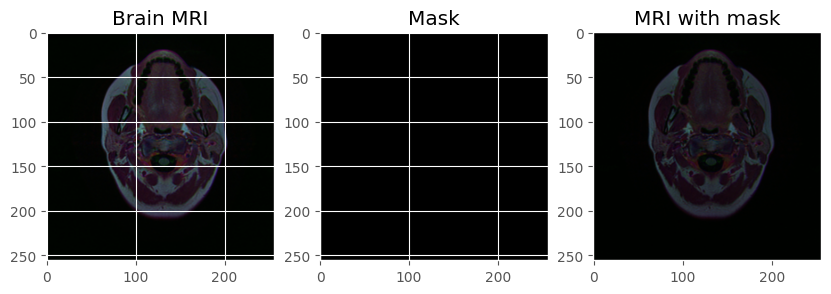

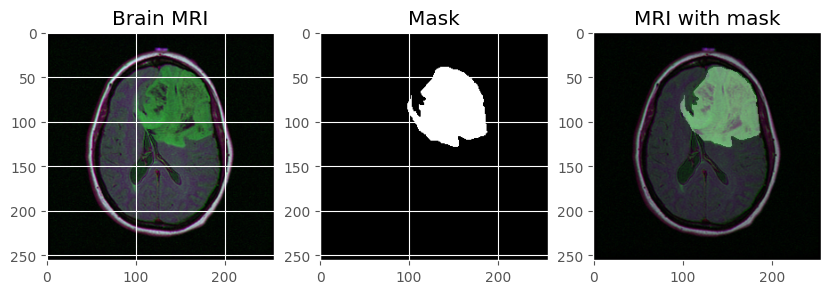

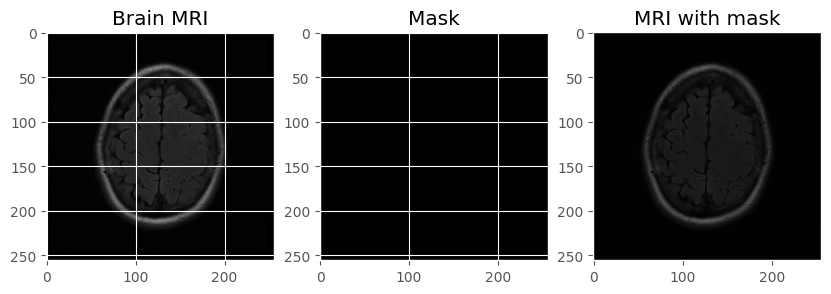

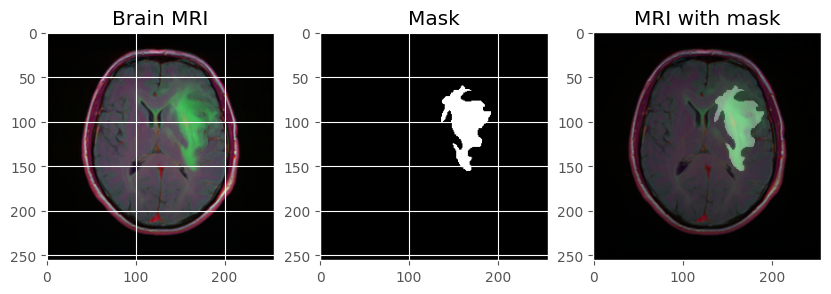

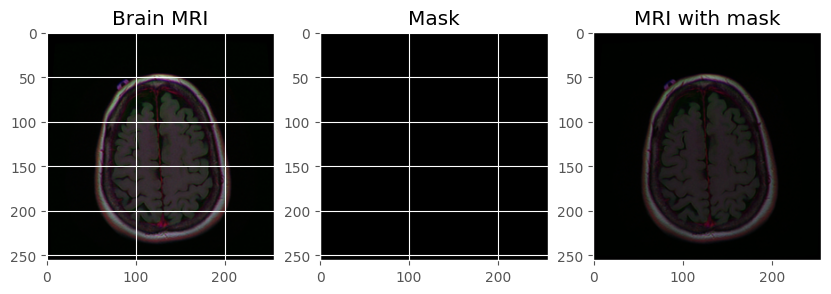

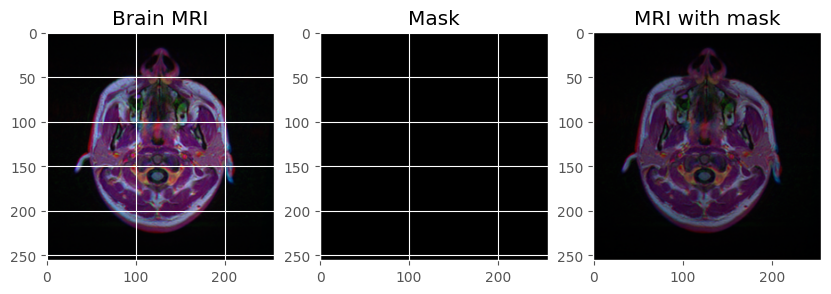

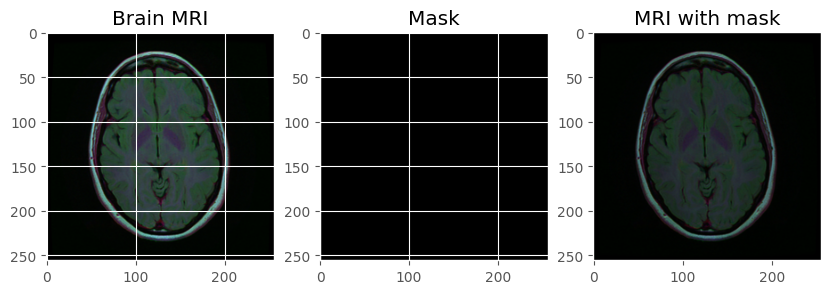

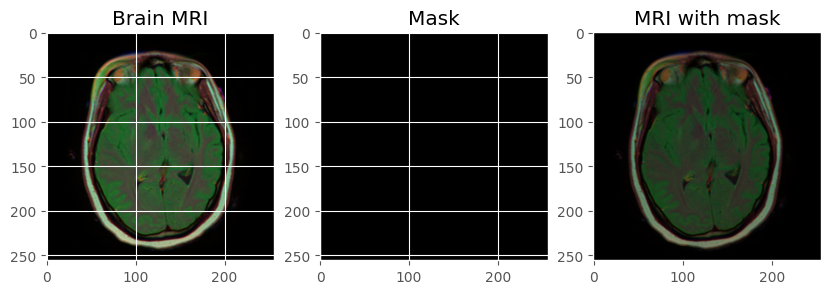

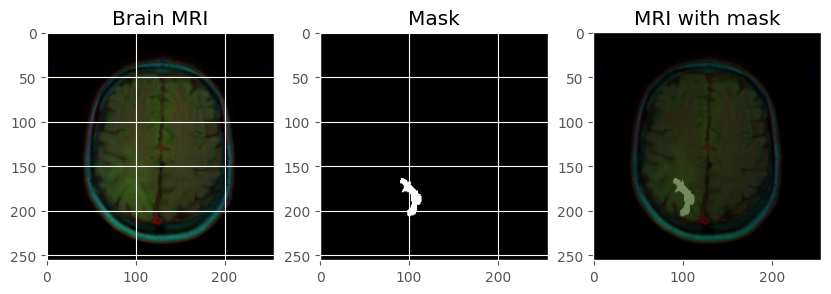

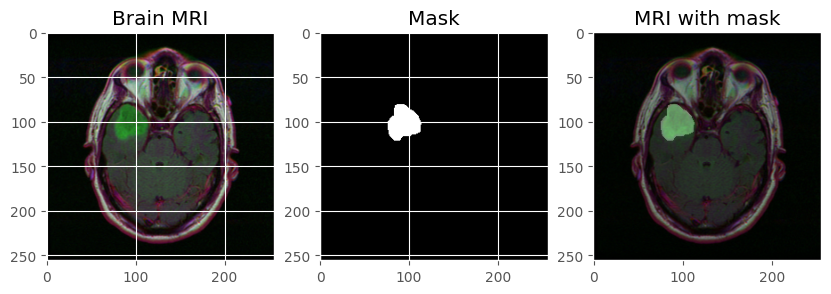

In [61]:
for i in range(10):
    plot_images()

The image and mask structures are visualized in the previous structure.
Given the MRI Images of Brain our task is to identify if a tumor is present in the image or not.
Above figure shows a sneak peak of what the data looks like. We have Brain MRIs labeled with a mask which indicates the presence of abnormality

# Train Test Split

In [30]:
imagePath_df['image-path'] = DataPath + imagePath_df['directory'] + '/' + imagePath_df['images']
imagePath_df['mask-path'] = DataPath + imagePath_df['directory'] + '/' + imagePath_df['masks']

In [31]:
train , test = train_test_split(imagePath_df, test_size=0.25, random_state=21)

In [32]:
EPOCHS = 30
BATCH_SIZE = 32
ImgHeight = 256
ImgWidth = 256
Channels = 3


# Data Generator

In [33]:
#for randomization of data
data_augmentation = dict(rotation_range=0.2, #random rotation
                        width_shift_range=0.05, #random width change
                        height_shift_range=0.05, #random height change
                        shear_range=0.05, #random deformity
                        zoom_range=0.05, #random zooming
                        horizontal_flip=True, #random flipping
                        fill_mode='nearest')

### Train

In [34]:
# image generator
imagegen = ImageDataGenerator(rescale=1./255., **data_augmentation)
maskgen = ImageDataGenerator(rescale=1./255., **data_augmentation)


# train images generator
timage_generator=imagegen.flow_from_dataframe(dataframe=train, #filepath
                                            x_col="image-path", #column containing image files
                                            batch_size= BATCH_SIZE, #training batch size
                                            seed=42, #sets random seed
                                            class_mode=None,
                                            target_size=(ImgHeight,ImgWidth),
                                            color_mode='rgb')
# train masks generator
tmask_generator=maskgen.flow_from_dataframe(dataframe=train,
                                            x_col="mask-path",
                                            batch_size=BATCH_SIZE,
                                            seed=42,
                                            class_mode=None,
                                            target_size=(ImgHeight,ImgWidth),
                                            color_mode='grayscale')

Found 2946 validated image filenames.
Found 2946 validated image filenames.


### Validation

In [35]:
# image generator
imagegen = ImageDataGenerator(rescale=1./255., **data_augmentation)
maskgen = ImageDataGenerator(rescale=1./255., **data_augmentation)


# validation images generator
vimage_generator=imagegen.flow_from_dataframe(dataframe=test,
                                            x_col="image-path",
                                            batch_size= BATCH_SIZE,
                                            seed=42,
                                            class_mode=None,
                                            target_size=(ImgHeight,ImgWidth),
                                            color_mode='rgb')
# validation masks generator
vmask_generator=maskgen.flow_from_dataframe(dataframe=test,
                                            x_col="mask-path",
                                            batch_size=BATCH_SIZE,
                                            seed=42,
                                            class_mode=None,
                                            target_size=(ImgHeight,ImgWidth),
                                            color_mode='grayscale')

Found 983 validated image filenames.
Found 983 validated image filenames.


In [36]:
def data_iterator(image_gen, mask_gen):
    for img, mask in zip(image_gen, mask_gen):
        yield img, mask

In [37]:
train_gen = data_iterator(timage_generator, tmask_generator)
valid_gen = data_iterator(vimage_generator, vmask_generator)

In [38]:
train_gen

<generator object data_iterator at 0x7d1a3caa3760>

In [39]:
valid_gen

<generator object data_iterator at 0x7d1a3caa37d0>

#U Net Architecture

In [40]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):

    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x

In [41]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)

    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)

    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)

    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [42]:
input_img = Input((ImgHeight, ImgWidth, 3), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.2, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [43]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         448       ['img[0][0]']                 
                                                                                                  
 batch_normalization_1 (Bat  (None, 256, 256, 16)         64        ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation_1 (Activation)   (None, 256, 256, 16)         0         ['batch_normalization_1[0]

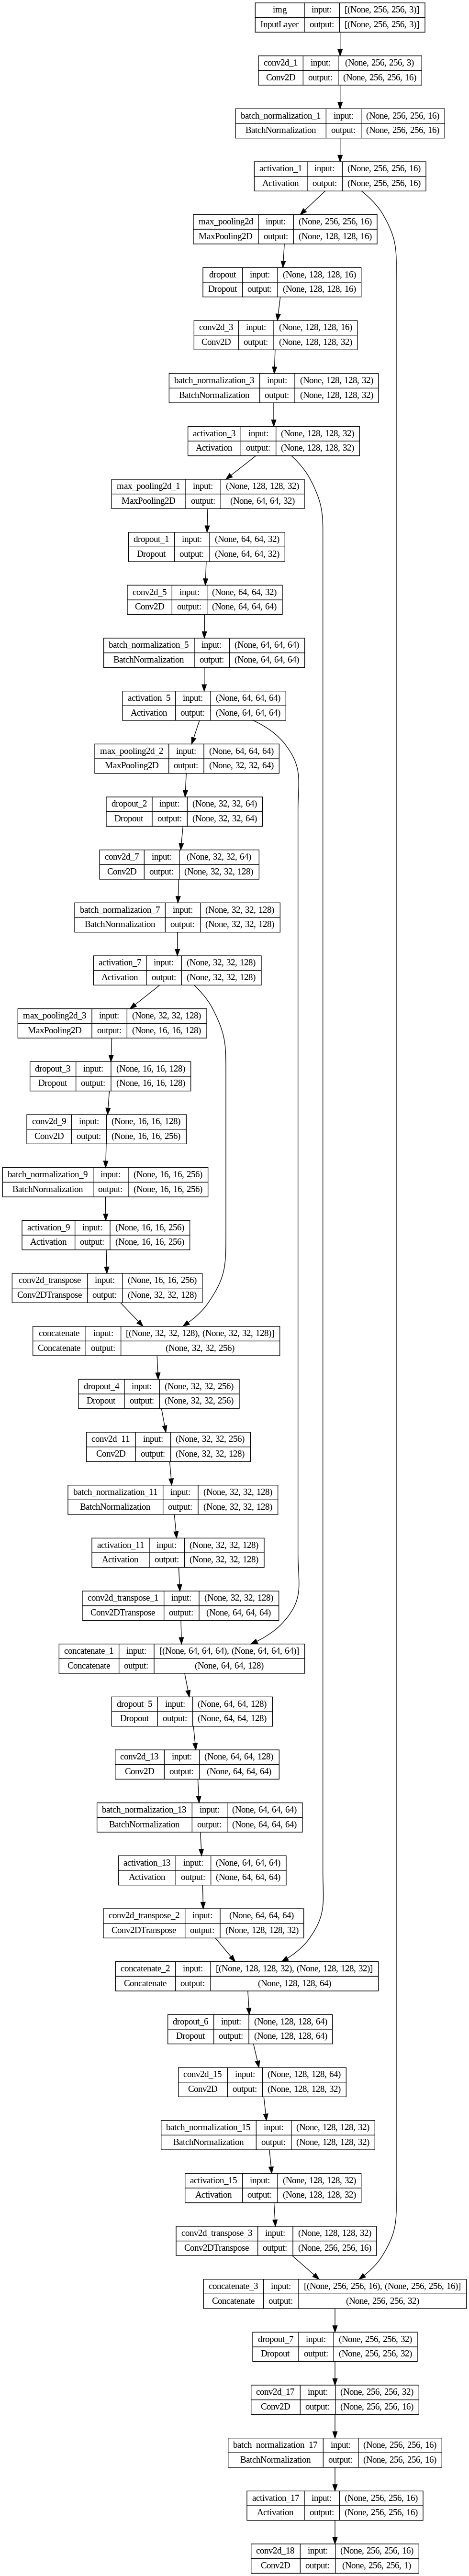

In [44]:
plot_model(model, to_file='model.png', show_shapes=True)

# Training the model

In [45]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-5, verbose=1),
    ModelCheckpoint('model-brain-mri.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [46]:
STEP_SIZE_TRAIN = timage_generator.n/BATCH_SIZE
STEP_SIZE_VALID = vimage_generator.n/BATCH_SIZE

In [47]:
results = model.fit(train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks,
                    validation_data=valid_gen,
                   validation_steps=STEP_SIZE_VALID)

Epoch 1/30
93/92 [==============================] - ETA: 0s - loss: 0.2906 - accuracy: 0.9604
Epoch 1: val_loss improved from inf to 0.21021, saving model to model-brain-mri.h5
92/92 [==============================] - 135s 1s/step - loss: 0.2906 - accuracy: 0.9604 - val_loss: 0.2102 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 2/30
92/92 [============================>.] - ETA: 0s - loss: 0.1248 - accuracy: 0.9893
Epoch 2: val_loss improved from 0.21021 to 0.12263, saving model to model-brain-mri.h5
92/92 [==============================] - 108s 1s/step - loss: 0.1248 - accuracy: 0.9893 - val_loss: 0.1226 - val_accuracy: 0.9872 - lr: 0.0010
Epoch 3/30
92/92 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9904
Epoch 3: val_loss improved from 0.12263 to 0.07739, saving model to model-brain-mri.h5
92/92 [==============================] - 107s 1s/step - loss: 0.0803 - accuracy: 0.9904 - val_loss: 0.0774 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 4/30
93/92 [==============

## Learning Curve

Accuracy

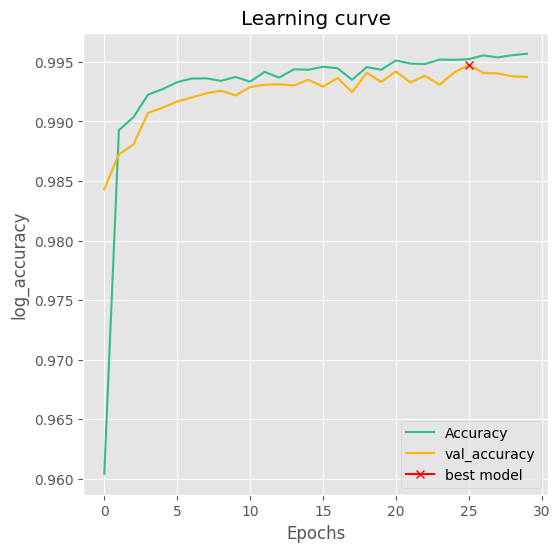

In [48]:
plt.figure(figsize=(6, 6))
plt.title("Learning curve")
plt.plot(results.history["accuracy"], label="Accuracy", color=sns.xkcd_rgb['greenish teal'])
plt.plot(results.history["val_accuracy"], label="val_accuracy", color=sns.xkcd_rgb['amber'])
plt.plot( np.argmax(results.history["val_accuracy"]), np.max(results.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_accuracy")
plt.legend()
# plt.grid(False)
plt.show()

Loss

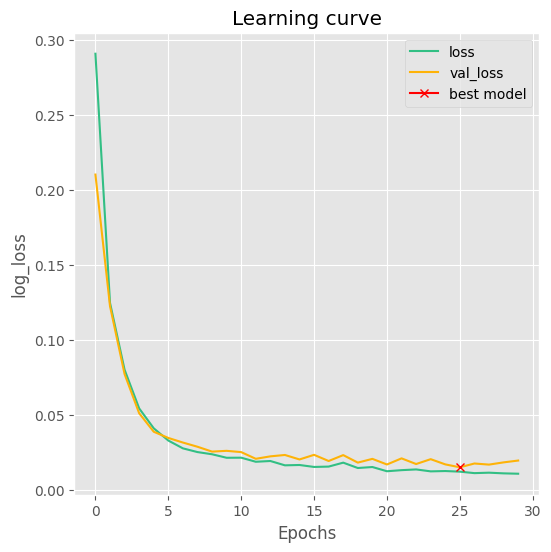

In [49]:
plt.figure(figsize=(6, 6))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss", color=sns.xkcd_rgb['greenish teal'])
plt.plot(results.history["val_loss"], label="val_loss", color=sns.xkcd_rgb['amber'])
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()
# plt.grid(False)
plt.show()

In [50]:
eval_results = model.evaluate(valid_gen, steps=STEP_SIZE_VALID, verbose=1)
print("Evaluation Results:", eval_results)

30/30 [==============================] - 20s 675ms/step - loss: 0.0101 - accuracy: 0.9957
Evaluation Results: [0.010071163065731525, 0.995684802532196]


## Final Prediction

1/1 [==============================] - 0s 39ms/step


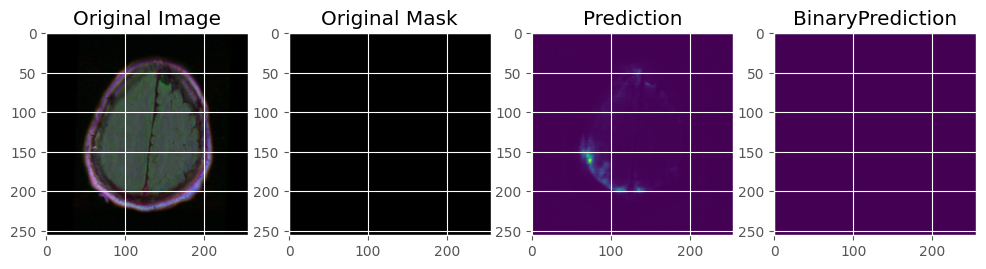

1/1 [==============================] - 0s 36ms/step


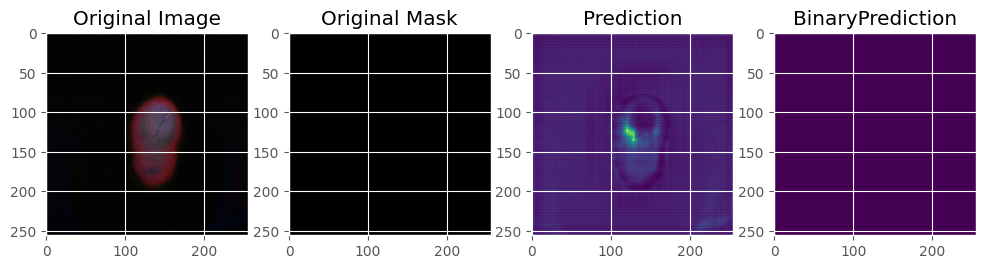

1/1 [==============================] - 0s 20ms/step


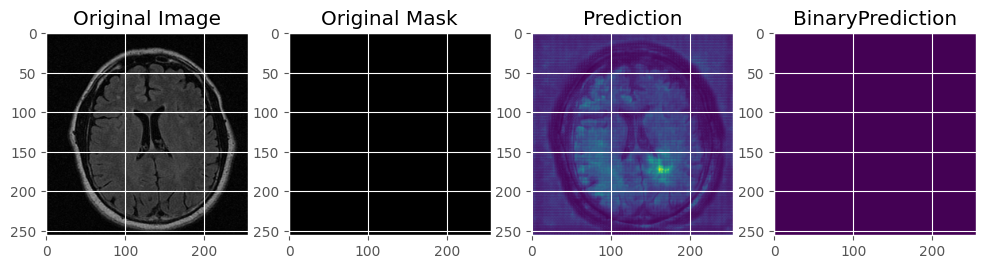

1/1 [==============================] - 0s 26ms/step


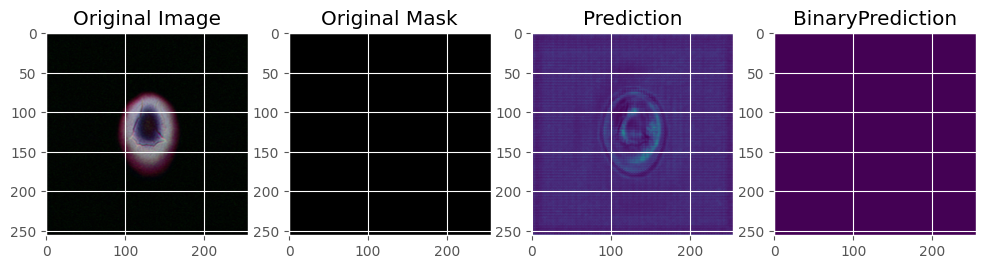

1/1 [==============================] - 0s 23ms/step


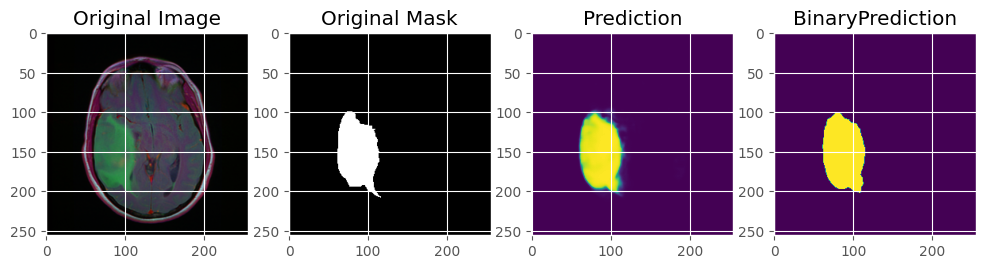

1/1 [==============================] - 0s 21ms/step


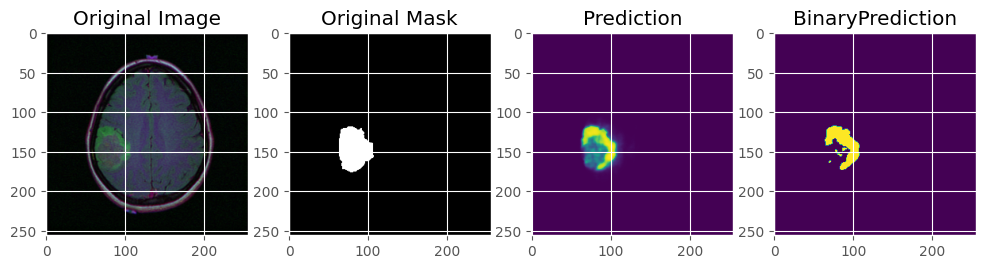

1/1 [==============================] - 0s 20ms/step


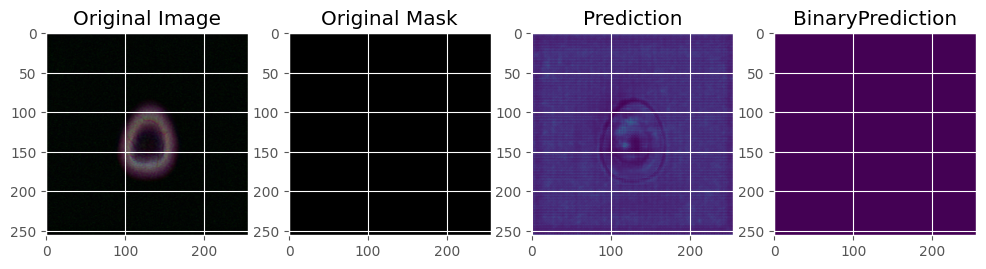

1/1 [==============================] - 0s 22ms/step


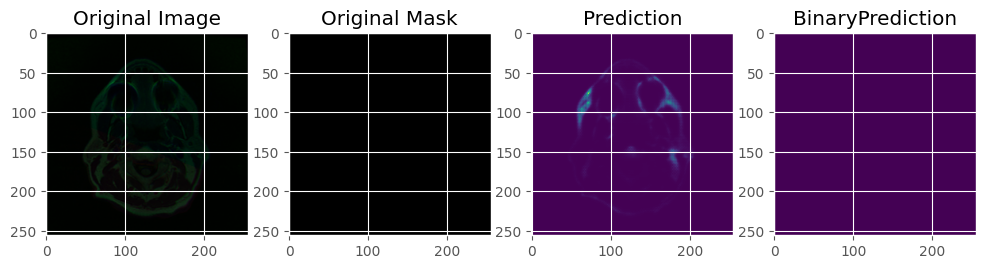

1/1 [==============================] - 0s 20ms/step


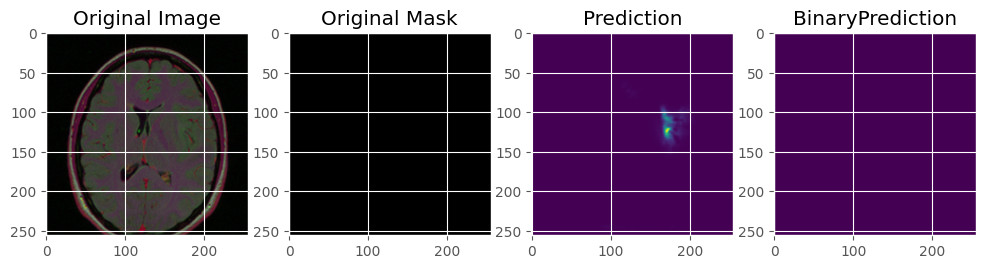

1/1 [==============================] - 0s 22ms/step


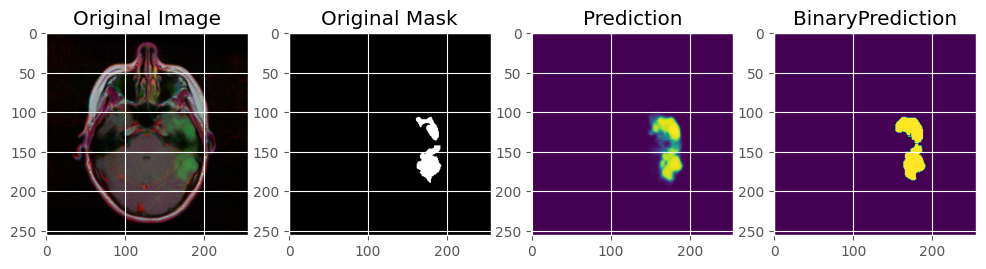

In [66]:
for i in range(10):
    idx = np.random.randint(0, len(imagePath_df))

    imagePath = DataPath + os.path.join(imagePath_df['directory'].iloc[idx], imagePath_df['images'].iloc[idx])
    maskPath =  DataPath + os.path.join(imagePath_df['directory'].iloc[idx], imagePath_df['masks'].iloc[idx])

    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)

    img = cv2.resize(image ,(ImgHeight, ImgWidth))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,4,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,4,2)
    plt.imshow(mask)
    plt.title('Original Mask')
    plt.subplot(1,4,3)
    plt.imshow(np.squeeze(pred))
    plt.title('Prediction')
    plt.subplot(1,4,4)
    plt.imshow(np.squeeze(pred) > 0.5)
    plt.title('BinaryPrediction')
    plt.show()